# 一、提出问题
本文简单分析当制作一部电影时，应考虑哪些客观因素才能使电影获得成功？为客户提供有效的数据依据，以便作出更准确的决策。本次数据分析报告主要围绕以下几点进行分析：

问题一：电影类型如何随时间发生变化？
    
    - 电影数量上的对比
    - 电影收入的对比

问题二：影响电影收入的客观因素有哪些？

问题三：两家电影公司Universal Pictures 和 Paramount Pictures之间的对比。
    
    - 电影发行数量上的对比
    - 电影产生的利润对比

问题四：改编电影和原创电影之间的对比。
    
    - 电影发行数量上的对比
    - 电影产生的利润对比

# 二、理解数据
获取数据：[Kaggle TMDB](https://www.kaggle.com/tmdb/tmdb-movie-metadata)

重点关注的变量有：
imdb_id：IMDB 标识号

popularity：在 Movie Database 上的相对页面查看次数

budget：预算（美元）

revenue：收入（美元）

original_title：电影名称

cast：演员列表，按 | 分隔，最多 5 名演员

homepage：电影首页的 URL

director：导演列表，按 | 分隔，最多 5 名导演

tagline：电影的标语

keywords：与电影相关的关键字，按 | 分隔，最多 5 个关键字

overview：剧情摘要

runtime：电影时长

genres：风格列表，按 | 分隔，最多 5 种风格

production_companies：制作公司列表，按 | 分隔，最多 5 家公司

release_date：首次上映日期

vote_count：评分次数

vote_average：平均评分

release_year：发行年份

budget_adj：根据通货膨胀调整的预算（2010 年，美元）

revenue_adj：根据通货膨胀调整的收入（2010 年，美元）

In [ ]:
# 1、导入模块
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
# 2、导入数据
credits_file = './tmdb_5000_credits.csv'
movies_file = './tmdb_5000_movies.csv'
credits = pd.read_csv(credits_file, encoding='utf-8')
movies = pd.read_csv(movies_file, parse_dates = ['release_date'])

# 查看数据集行列数
print(
    'credits:', credits.shape,
    'movies:', movies.shape
)

credits: (4803, 4) movies: (4803, 20)


In [6]:
# 3、查看信息
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [9]:
# 4、#合并数据集,并查看数据集行列数和数据类型，缺失情况
del credits['title'] #两个数据集中title相同，删除其中一个
full = pd.concat([credits, movies], axis=1) # 按照索引进行列合并，因为两个表的索引都是一一对应的，所以可以直接连接
print('合并后的数据集：', full.shape)

合并后的数据集： (4803, 23)


In [10]:
full.head()

,movie_id,cast,crew,budget,genres,homepage,id,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# 三、数据清洗

In [17]:
# 1、选择子集
full = full[
    [
        'id', 'title', 'vote_average',
        'production_companies', 'genres', 'release_date',
        'keywords', 'runtime', 'budget',
        'revenue', 'vote_count', 'popularity'
    ]
]

In [18]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    4803 non-null   int64         
 1   title                 4803 non-null   object        
 2   vote_average          4803 non-null   float64       
 3   production_companies  4803 non-null   object        
 4   genres                4803 non-null   object        
 5   release_date          4802 non-null   datetime64[ns]
 6   keywords              4803 non-null   object        
 7   runtime               4801 non-null   float64       
 8   budget                4803 non-null   int64         
 9   revenue               4803 non-null   int64         
 10  vote_count            4803 non-null   int64         
 11  popularity            4803 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 375.3+ K

In [21]:
# 2、缺失值处理
full[full['release_date'].isnull()]['title']

4553    America Is Still the Place
Name: title, dtype: object

In [22]:
# #\上网查到缺失电影首次上映日期为2014-06-01，填充缺失值
full['release_date'] = full['release_date'].fillna('2014-06-01')

In [27]:
full.loc[4553,'release_date']

'2014-06-01'

In [29]:
# #runtime缺失两条数据，数值型可用平均数填充
full['runtime'] = full['runtime'].fillna(full['runtime'].mean())

In [30]:
full.isnull().sum()

id                      0
title                   0
vote_average            0
production_companies    0
genres                  0
release_date            0
keywords                0
runtime                 0
budget                  0
revenue                 0
vote_count              0
popularity              0
dtype: int64

In [32]:
# 3、数据类型转换
# 时间序列中提取年份
full['release_date'].head()
full['release_year'] = pd.to_datetime(full['release_date'], format='%Y-%m-%d').dt.year

In [33]:
full['release_year'].head()

0    2009
1    2007
2    2015
3    2012
4    2012
Name: release_year, dtype: int64

In [35]:
# json格式转换为字符串
full['genres'].head(5)

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

In [38]:
# 定义函数
def getname(x):
    a = []
    for i in x:
        a.append(i['name'])
    return ','.join(a)

In [42]:
#genres 风格种类
full['genres'] = full['genres'].apply(json.loads)
full['genres'] = full['genres'].apply(getname)
full['genres'].head(3)

0    Action,Adventure,Fantasy,Science Fiction
1                    Adventure,Fantasy,Action
2                      Action,Adventure,Crime
Name: genres, dtype: object

In [45]:
# production_companies 制作公司
full['production_companies'] = full['production_companies'].apply(json.loads) # 只有用json.loads，才能将str转换为dict类型，方便后续取values
full['production_companies'] = full['production_companies'].apply(getname)

In [46]:
full['production_companies'].head(3)

0    Ingenious Film Partners,Twentieth Century Fox ...
1    Walt Disney Pictures,Jerry Bruckheimer Films,S...
2                         Columbia Pictures,Danjaq,B24
Name: production_companies, dtype: object

In [47]:
# keywords 与电影相关的关键字
full['keywords']=full['keywords'].apply(json.loads)# apply函数，用于Series，使得每一个元素都应用该函数
full['keywords']=full['keywords'].apply(getname)
full['keywords'].head(3)

0    culture clash,future,space war,space colony,so...
1    ocean,drug abuse,exotic island,east india trad...
2    spy,based on novel,secret agent,sequel,mi6,bri...
Name: keywords, dtype: object

# 四、问题分析

In [55]:
# 1、电影类型随时间变化

genresList = set() #用集合提取出不重复的类型
for s in full['genres'].str.split(','):
    genresList = set().union(s, genresList)
genresList = list(genresList)
genresList.remove('') # 去除空数
genresList # 一共有这么多种类的电影，使用set集合，加上循环和set.union()去实现种类梳理

['Mystery',
 'Crime',
 'Fantasy',
 'Music',
 'Documentary',
 'Romance',
 'Thriller',
 'TV Movie',
 'Comedy',
 'History',
 'Animation',
 'Family',
 'Science Fiction',
 'Foreign',
 'Western',
 'War',
 'Drama',
 'Action',
 'Adventure',
 'Horror']

In [77]:
#将电影类型添加到列，需进行one-hot编码
genresDf = pd.DataFrame()
for genre in genresList: # 通过循环实现one-hot编码，每循环一次就会添加一列
    genresDf[genre] = full['genres'].str.contains(genre).apply(lambda x:1 if x else 0)
# 如果该电影的类型中包含对应类型，就设置为1，否则为0

genresDf.head(3)

,Mystery,Crime,Fantasy,Music,Documentary,Romance,Thriller,TV Movie,Comedy,History,Animation,Family,Science Fiction,Foreign,Western,War,Drama,Action,Adventure,Horror
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [80]:
# #用年份索引

genresDf['release_year'] = full['release_year']
genresDf.index = full['release_year']
genresDf = genresDf.sort_index()
genresDf.head() # 按年份作为索引，方便后续统计

,Mystery,Crime,Fantasy,Music,Documentary,Romance,Thriller,TV Movie,Comedy,History,...,Family,Science Fiction,Foreign,Western,War,Drama,Action,Adventure,Horror,release_year
release_year,,,,,,,,,,,,,,,,,,,,,
1916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1916
1925,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1925
1927,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1927
1929,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1929
1929,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1929


In [81]:
genresDf['release_year'].head()

release_year
1916    1916
1925    1925
1927    1927
1929    1929
1929    1929
Name: release_year, dtype: int64

In [88]:
#对每个类型的电影按年份求和
genresDf.index.name = 'release_year_index'
genresDf = genresDf.groupby('release_year').sum()

,Mystery,Crime,Fantasy,Music,Documentary,Romance,Thriller,TV Movie,Comedy,History,Animation,Family,Science Fiction,Foreign,Western,War,Drama,Action,Adventure,Horror
release_year_index,,,,,,,,,,,,,,,,,,,,
1916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1925,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1927,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1929,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,2,0,0,0
1930,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0


In [89]:
genresDf.head()

,Mystery,Crime,Fantasy,Music,Documentary,Romance,Thriller,TV Movie,Comedy,History,Animation,Family,Science Fiction,Foreign,Western,War,Drama,Action,Adventure,Horror
release_year_index,,,,,,,,,,,,,,,,,,,,
1916,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1925,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1927,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1929,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,2,0,0,0
1930,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0


In [90]:
genresDf.shape

(90, 20)

In [93]:
#汇总各电影类型的总量
total = genresDf.sum().sort_values()

# 选出数量最多的十类电影
total = total[-10:]
total

Family              513
Horror              519
Science Fiction     535
Crime               696
Adventure           790
Romance             894
Action             1154
Thriller           1274
Comedy             1722
Drama              2297
dtype: int64

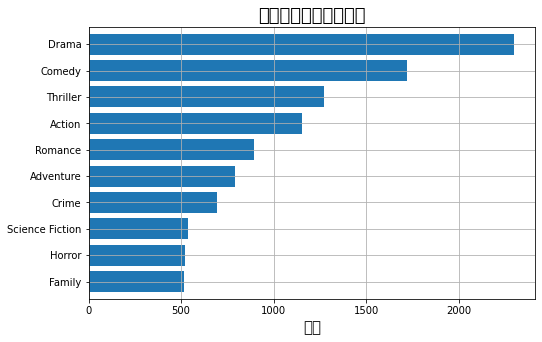

In [94]:
# #数量最多的10大类型电影
total.plot(
    kind = 'barh',figsize = (8, 5), width = 0.8
)
plt.title('各电影类型的数量对比',fontsize=18)
plt.xlabel('数量',fontsize=15)
plt.grid(True)
plt.show()

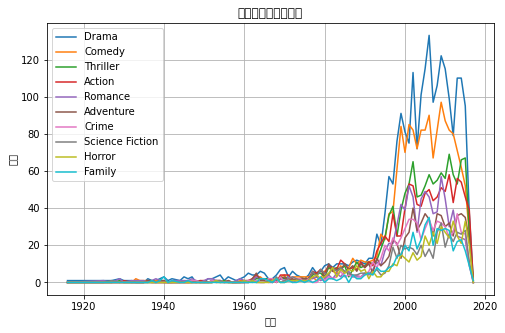

In [97]:
#电影类型随时间的变化
genresDf=genresDf[['Drama','Comedy','Thriller','Action','Romance','Adventure',
                   'Crime','Science Fiction','Horror','Family']]
genresDf.plot(figsize=(8, 5))
plt.title('电影类型随时间变化')
plt.xlabel('时间')
plt.ylabel('数量')
plt.grid(True)
plt.show()

从上图可以看出，所有类型的电影在1960年前几乎没什么变化，从1960-1990开始缓慢增长，此后呈现急剧增长，其中戏剧（Drama）增长最快，数量最多，喜剧（Comedy）次之，到近代恐怖片（Thriller）数量超过喜剧，动作片（Action）接近恐怖片。这四类电影都可作为投资的首选。

In [100]:
# 2、影响电影收入的客观因素有哪些？
#电影收入的相关矩阵
corrDf = full.corr()
corrDf['revenue'].sort_values(ascending = False) #相关程度按降序排列

# 为什么收入与评分数不挂钩？？

revenue         1.000000
vote_count      0.781487
budget          0.730823
popularity      0.644724
runtime         0.251080
vote_average    0.197150
release_year    0.090084
id             -0.050425
Name: revenue, dtype: float64

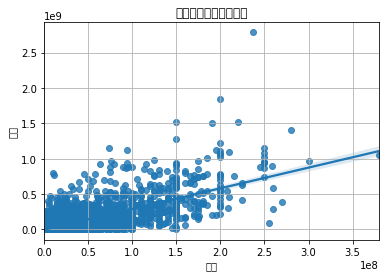

In [103]:
#电影收入与预算的关系
sns.regplot(
    full['budget'], full['revenue']
)
plt.title('电影收入与预算的关系')
plt.xlabel('预算')
plt.ylabel('收益')
plt.grid(True)
plt.show()

可以看出，电影收入与评分次数、预算、电影页面相对查看次数的相关性较高。
电影收入和预算的相关性曲线是正线性相关，所以，保证一定的电影预算是提高电影收入的重要基础。

In [104]:
# 3、Universal Pictures和Paramount Pictures之间的对比
# 3.1 电影发行量对比

# #电影发行总量对比
full['Universal Pictures'] = full['production_companies'].str.contains('Universal Pictures').apply(lambda x:1 if x else 0)
full['Paramount Pictures']=full['production_companies'].str.contains('Paramount Pictures').apply(lambda x:1 if x else 0)

In [106]:
Universal_total = full['Universal Pictures'].sum()
Paramount_total = full['Paramount Pictures'].sum()

In [107]:
total_all =pd.Series(
    {
        'Universal Pictures':Universal_total,
        'Paramount Pictures':Paramount_total
    }
)
total_all

Universal Pictures    314
Paramount Pictures    285
dtype: int64

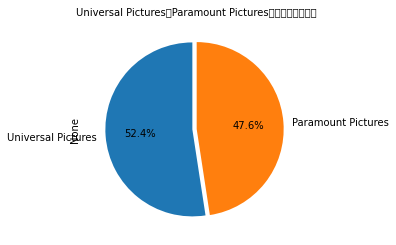

In [116]:
# 可视化
total_all.plot(
    kind='pie',
    autopct = '%1.1f%%',
    explode = (0.05, 0),
    startangle = 90,
    labeldistance = 1.1,
    shadow = False
)
plt.title('Universal Pictures和Paramount Pictures电影发行总量对比',fontsize=10)
plt.show()

In [118]:
#利润=收入-预算
full['profit'] = full['revenue'] - full['budget']
full['Universal_profit'] = full['Universal Pictures'] * full['profit']
full['Paramount_profit'] = full['Paramount Pictures'] * full['profit']


In [120]:

#电影年发行量对比
companyDf=full[['release_year','Universal Pictures','Paramount Pictures','Universal_profit',
              'Paramount_profit']]
companyDf.index = companyDf['release_year']

In [121]:
companyDf.head()

,release_year,Universal Pictures,Paramount Pictures,Universal_profit,Paramount_profit
release_year,,,,,
2009,2009,0,0,0,0
2007,2007,0,0,0,0
2015,2015,0,0,0,0
2012,2012,0,0,0,0
2012,2012,0,0,0,0


In [122]:
companyDf = companyDf.sort_index()

In [123]:
companyDf.head()

,release_year,Universal Pictures,Paramount Pictures,Universal_profit,Paramount_profit
release_year,,,,,
1916,1916,0,0,0,0
1925,1925,0,0,0,0
1927,1927,0,1,0,-91969578
1929,1929,0,0,0,0
1929,1929,0,0,0,0


In [126]:
companyDf.index.name = 'release_year_index'
companyDf = companyDf.groupby('release_year').sum()

In [127]:
companyDf.head()

,Universal Pictures,Paramount Pictures,Universal_profit,Paramount_profit
release_year,,,,
1916,0,0,0,0
1925,0,0,0,0
1927,0,1,0,-91969578
1929,0,0,0,0
1930,0,0,0,0


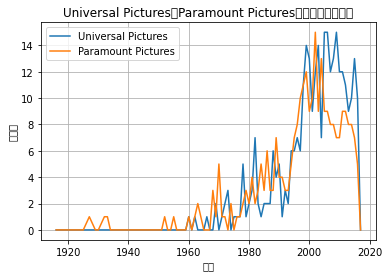

In [131]:
# 可视化
plt.plot(companyDf.index, companyDf['Universal Pictures'], label ='Universal Pictures')
plt.plot(companyDf.index,companyDf['Paramount Pictures'],label='Paramount Pictures')
plt.xlabel('时间')
plt.ylabel('发行量')
plt.title('Universal Pictures和Paramount Pictures电影年发行量对比')
plt.grid(True)
plt.legend()
plt.show()

从电影发行总量上看，Universal Pictures公司比Paramount Pictures公司多；
从电影年发行量随时间的变化来看，两家制作公司基本都是在增长，但Universal Pictures公司在近期增长更平稳。

In [136]:
# 3.2 利润对比
Universal_profit = full['Universal_profit'].sum()
Paramount_profit = full['Paramount_profit'].sum()
profit_total = pd.Series(
    {
        'Universal_profit':Universal_profit,
        'Paramount_profit':Paramount_profit
    }
    )
profit_total

Universal_profit    28990348596
Paramount_profit    27568910158
dtype: int64

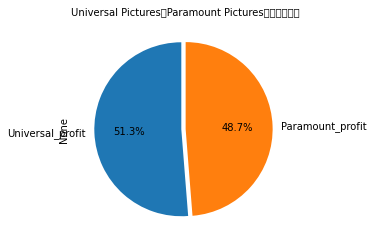

In [137]:
#可视化
profit_total.plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0),
                 startangle=90,labeldistance=1.1,shadow=False)
plt.title('Universal Pictures和Paramount Pictures的总利润对比',fontsize=10)
plt.show()

In [138]:
#年利润对比可视化
companyDf

,Universal Pictures,Paramount Pictures,Universal_profit,Paramount_profit
release_year,,,,
1916,0,0,0,0
1925,0,0,0,0
1927,0,1,0,-91969578
1929,0,0,0,0
1930,0,0,0,0
...,...,...,...,...
2013,9,8,1428688528,1639566536
2014,10,8,962619293,2154917115
2015,13,7,3371752734,1372223243


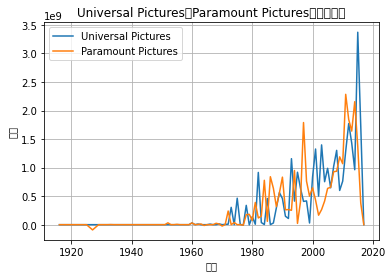

In [139]:
plt.plot(companyDf.index,companyDf['Universal_profit'],label='Universal Pictures')
plt.plot(companyDf.index,companyDf['Paramount_profit'],label='Paramount Pictures')
plt.xlabel('时间')
plt.ylabel('利润')
plt.title('Universal Pictures和Paramount Pictures年利润对比')
plt.grid(True)
plt.legend()
plt.show()

两家制作公司的利润对比，总利润Universal Pictures公司多于Paramount Pictures公司；
从年利润上看，两家公司利润都随时间增长，其中Universal_profit公司增长较平稳，且最近几年增长最快。

由此可见，相较于Universal Pictures公司，选择Paramount Pictures公司带来高回报的概率更高。

In [140]:
# 4、改编电影和原创电影的对比
# 4.1 数量对比
full['keywords'].head()

0    culture clash,future,space war,space colony,so...
1    ocean,drug abuse,exotic island,east india trad...
2    spy,based on novel,secret agent,sequel,mi6,bri...
3    dc comics,crime fighter,terrorist,secret ident...
4    based on novel,mars,medallion,space travel,pri...
Name: keywords, dtype: object

In [141]:
full['if_original'] = full['keywords'].str.contains('based on novel').apply(lambda x:'not original' if x else 'original')
full['if_original'].head()

0        original
1        original
2    not original
3        original
4    not original
Name: if_original, dtype: object

In [142]:
#两种类型数量汇总信息
key_count = full['if_original'].value_counts()
key_count

original        4606
not original     197
Name: if_original, dtype: int64

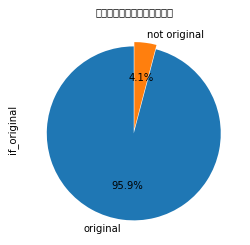

In [144]:
#可视化
key_count.plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0),
                 startangle=90,labeldistance=1.1,shadow=False)
plt.title('改编电影和原创电影数量对比',fontsize=10)
plt.show()

In [145]:
# 4.2 改编电影和原创电影平均利润对比
#原创电影和改编电影的平均利润
original_total = full.groupby('if_original')['profit'].mean()
original_total

if_original
not original    9.848457e+07
original        5.127943e+07
Name: profit, dtype: float64

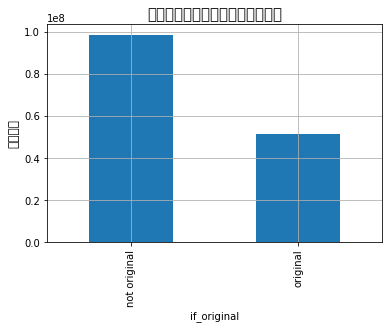

In [146]:
#可视化
original_total.plot(kind='bar')
plt.title('改编电影和原创电影平均利润对比',fontsize=15)
plt.ylabel('平均利润',fontsize=12)
plt.grid(True)
plt.show()

从以上两幅可视化图片可以看出，原创电影的发行数量远远多于改编电影；
但改编电影的平均利润却是原创电影的近两倍；说明原创电影虽然是主流电影，但好的小说改编电影却能带来更多的利润。
所以，如果有较好的小说剧本，可以尝试制作改编电影，可以带来更多的收益。

结论
1. 所有类型的电影的数量都随时间的推移而增长，其中戏剧（Drama）增长最快，数量最多，喜剧（Comedy）次之，到近代恐怖片（Thriller）数量超过喜剧，动作片（Action）也接 近恐怖片。这四类电影都可作为投资的首选。
2. 电影收入与评分次数、预算、电影页面相对查看次数的相关性较高，所以适当增加电影预算 和广告宣传，都可以使电影收入增长。
3. Universal Pictures 和 Paramount Pictures两家制作公司对比，Universal Pictures 公司
在发行数量和利润上都占有优势。
4. 原创电影虽然是主流电影，但好的小说改编电影却能带来更多的利润。如果有较好的小说剧本，可以尝试制作改编电影，可以带来更多的收益。